# Linear Algebra for Data Science. Home Test
## Prepared by Said Magomedov, group MFE221

In [1]:
%%html
<style>
  .rendered_html {
    font-family: "Palatino", serif;
  }
</style>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from scipy.interpolate import BPoly

## Problem 1
### Singular Value Decomposition (SVD)
$ \mathbf{A = U \Sigma V^T}$
* $\Sigma$ - diagonal matrix of singular values $\sigma_i = \sqrt{\lambda_i(A^T A)}$
* V - matrix of eigenvectors of matrix $A^T A$
* $U = A V \Sigma ^{-1}$ or $U^i = \frac{1}{\sigma^i}(A V)^i$ if there are zero eigenvalues

In [3]:
A = np.array([[46, -68, -26, 36], [-70, 32, -31, -54], [16, 52, 10, -36]])

def svd(A):
    ATA = A.T@A
    lambdas, V = np.linalg.eig(ATA)
    lambdas = np.where(lambdas < 0, 0, lambdas)
    Sigma = np.diag(np.sqrt(lambdas))
    u0 = A@V[:, 0] / Sigma[0,0]
    u1 = A@V[:, 1] / Sigma[1,1]
    u2 = A@V[:, 2] / Sigma[2,2]
    u3 = np.zeros(3)
    U = np.array([u0, u1, u2, u3]).T
    SVD = U@Sigma@V.T
    
    return [SVD, U, Sigma, V.T]

In [7]:
matrices = svd(A)
output = []
for matrix in matrices:
    matrix_str = "\\begin{bmatrix}\n"
    matrix_str += "\\\\\n".join([" & ".join(map(str, row)) for row in np.round(matrix, 3)])
    matrix_str += "\n\\end{bmatrix}"
    output.append(matrix_str)

Let's make sure that the obtained SVD is indeed the initial matrix A

In [8]:
display(Math(f"SVD = {output[0]}"))
print(f"SVD is indeed A: {np.all(np.round(matrices[0], 0) == A)}.")

<IPython.core.display.Math object>

SVD is indeed A: True.


Now let's display the obtained decomposition

In [6]:
display(Math(f"A = {output[1]} * {output[2]} * {output[3]}"))

<IPython.core.display.Math object>

---
---

## Problem 2
### Full rank decomposition and pseudoinverse 
To find a full rank decomposition I will use the skeletonization method.

In [7]:
A = np.array([[3, -11, -10], [4, -15, -14], [-2, 9, 10], [-1, 5, 6]])
print(A, f"Rank = {np.linalg.matrix_rank(A)}.", sep="\n"*2)

[[  3 -11 -10]
 [  4 -15 -14]
 [ -2   9  10]
 [ -1   5   6]]

Rank = 2.


It is possible to express the third column as a linear combination of the first two with weights 4 and 2 respectively. <br>
So one can decompose A as a product of two matrices F and G of full rank. 

In [9]:
F = A[:, :2]
G = np.array([[1, 0, 4], [0, 1, 2]])
skel = []
for matrix in [F, G]:
    matrix_str = "\\begin{bmatrix}\n"
    matrix_str += "\\\\\n".join([" & ".join(map(str, row)) for row in np.round(matrix, 2)])
    matrix_str += "\n\\end{bmatrix}"
    skel.append(matrix_str)
display(Math(f"A = {skel[0]} * {skel[1]}"))

<IPython.core.display.Math object>

Make sure that the result of multiplication is indeed the initial matrix A.

In [10]:
print(f"Product of matrices F and G is A: {np.all(A == F@G)}.")

Product of matrices F and G is A: True.


The skeletonization method implies that if $\mathbf{A = F \cdot G}$ is a full rank decomposition, then $\mathbf{A^+ = G^+F^+}$, where $\mathbf{F^+ = (F^TF)^{-1}F^T}$ (almost analogically for G as it has full **row** rank).

In [11]:
F_pinv = np.linalg.inv(F.T@F)@F.T
G_pinv = G.T@np.linalg.inv(G@G.T)
A_pinv = G_pinv@F_pinv
A_pinv_str = "\\begin{bmatrix}\n"
A_pinv_str += "\\\\\n".join([" & ".join(map(str, row)) for row in np.round(A_pinv, 3)])
A_pinv_str += "\n\\end{bmatrix}"
display(Math(f"A^+ = {A_pinv_str}"))

<IPython.core.display.Math object>

---
---

## Problem 3
### The minimal length least square solution of the system of linear equations
$AX = b$, where $X = (x, y, z, t)^T$ and A, b are matrix and vector of coefficients.<br>
The least square solution (pseudosolution) of minimal length is the following:
$X = A^+b$

In [26]:
A = np.array([[3, -10, 12, 0], [-1, 6, 11, -5], [-2, 10, 6, 8], [4, -14, 15, -7]])
b = np.array([1, 4, 2, 3])

Matrix A does not have a full rank => it is necessary to apply a full rank decomposition to it in order to compute its pseudoinverse matrix analogically to the previous task.

In [36]:
F = A[:, :3]
G = np.array([[1, 0, 0, 62], [0, 1, 0, 15], [0, 0, 1, -3]])
skel = []
for matrix in [F, G]:
    matrix_str = "\\begin{bmatrix}\n"
    matrix_str += "\\\\\n".join([" & ".join(map(str, row)) for row in np.round(matrix, 2)])
    matrix_str += "\n\\end{bmatrix}"
    skel.append(matrix_str)
display(Math(f"A = {skel[0]} * {skel[1]}"))

<IPython.core.display.Math object>

In [34]:
F_pinv = np.linalg.inv(F.T@F)@F.T
G_pinv = G.T@np.linalg.inv(G@G.T)
A_pinv = G_pinv@F_pinv
X = np.round(A_pinv@b, 2)
print(f"x = {X[0]}, y = {X[1]}, z = {X[2]}, t = {X[3]}.")

x = -0.02, y = 0.14, z = 0.24, t = -0.14.


---
---

## Problem 4
### The polynomial interpolation in the Lagrange form
General formula: $ f(x) = \displaystyle\sum_{i=1}^{n} y_i \prod_{i\neq j} \dfrac{x-x_j}{x_i-x_j}$ <br>
So in our case $ f(x) = -2 \cdot \dfrac{(x-1)(x-2)(x+2)}{(-3+2)(-3-1)(-3-2)} + 18 \cdot \dfrac{(x-1)(x-2)(x+3)}{(-2+3)(-2-1)(-2-2)} -11 \cdot \dfrac{(x-2)(x+3)(x+2)}{(1-2)(1+3)(1+2)} - 11 \cdot \dfrac{(x+3)(x+2)(x-1)}{(2+3)(2+2)(2-1)} = \\ = \mathbf{1.97x^3 + 0.45x^2 - 15.12x + 1.7}.$

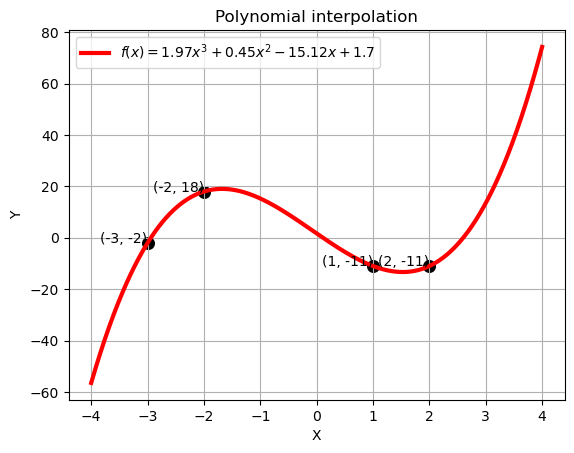

In [15]:
x = np.linspace(-4, 4, 1000)
y = 59/30 * x**3 + 9/20 * x**2 - 907/60 * x + 17/10
highlighted_points_x = [-3, -2, 1, 2]
highlighted_points_y = [-2, 18, -11, -11]
plt.plot(x, y, label=r"$f(x) = 1.97x^3 + 0.45x^2 - 15.12x + 1.7$", 
         linewidth=3, color="red")
plt.scatter(highlighted_points_x, highlighted_points_y, color="black", s=70)
for (x, y) in zip(highlighted_points_x, highlighted_points_y):
    plt.text(x, y, f"({x}, {y})", fontsize=10, ha="right")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial interpolation")
plt.legend()
plt.grid()
plt.show()

---
---

## Problem 5
### Bezier curve
$ P = \begin{bmatrix} 1 & 3 & 4 & 5 \\ 6 & 2 & 0 & 0 \\ \end{bmatrix}$

$\tilde{B}_1(t) = (1-t)B_1(t) + tB_2(t) = (1-t)P_0 +t(1-t) \cdot \begin{bmatrix} 2 \\ -4 \\ \end{bmatrix} + tP_1 + t^2 \cdot \begin{bmatrix} 1 \\ -2 \\ \end{bmatrix} = P_0 + t \cdot \begin{bmatrix} 4 \\ -8 \\ \end{bmatrix} + t^2 \cdot \begin{bmatrix} -1 \\ 2 \\ \end{bmatrix}$ <br>

$\tilde{B}_2(t) = (1-t)B_2(t) + tB_3(t) = (1-t)P_1 +t(1-t) \cdot \begin{bmatrix} 1 \\ -2 \\ \end{bmatrix} + tP_2 + t^2 \cdot \begin{bmatrix} 1 \\ 0 \\ \end{bmatrix} = P_1 + t \cdot \begin{bmatrix} 2 \\ -4 \\ \end{bmatrix} + t^2 \cdot \begin{bmatrix} 0 \\ 2 \\ \end{bmatrix}$ <br>

$B(t) = (1-t)\tilde{B}_1(t) + t\tilde{B}_2(t) = (1-t)P_0 + t(1-t)\cdot \begin{bmatrix} 4 \\ -8 \\ \end{bmatrix} + t^2(1-t)\cdot \begin{bmatrix} -1 \\ 2 \\ \end{bmatrix} + tP_1 + t^2\cdot \begin{bmatrix} 2 \\ -4 \\ \end{bmatrix} + t^3\cdot \begin{bmatrix} 0 \\ 2 \\ \end{bmatrix} = $<br>
$ = \begin{bmatrix} 1 \\ 6 \\ \end{bmatrix} + t\cdot \begin{bmatrix} 6 \\ -12 \\ \end{bmatrix} + t^2\cdot \begin{bmatrix} -3 \\ 6 \\ \end{bmatrix} + t^3\cdot \begin{bmatrix} 1 \\ 0 \\ \end{bmatrix}$ <br>

So $B(t) = \begin{bmatrix} t^3 - 3t^2 + 6t + 1 \\ 6t^2 - 12t + 6 \\ \end{bmatrix}$ 

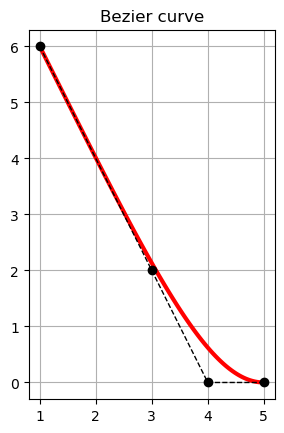

In [30]:
control_points = np.array([(1, 6), (3, 2), (4, 0), (5, 0)])
curve = BPoly(control_points[:, None, :], [0, 1])

X = np.linspace(0, 1, 100)
sampled_points = curve(X)

plt.gca().set_aspect("equal")
plt.plot(*sampled_points.T, "-", linewidth=3, color="red")
plt.plot(*control_points.T, "--o", linewidth=1, color="black")
plt.grid()
plt.title("Bezier curve")
plt.show()

---
---

## Problem 6
### The best approximation polynomial of degree 2 wrt max-norm on [1, 5]
Approximated function: $f(x) = x^3 -3x^2 + 4x + 5.$ <br>
Approximating function: $\tilde{f}(x) = ax^2 + bx + c.$ <br>
Let's use the general formula $\bar{T}_n(x) = \dfrac{(b-a)^n}{2^(2n-1)} \cdot T_n \Bigl(\dfrac{2x - (b+a)}{b-a}\Bigl)$<br>
So in our case $\bar{T}_3(x) = \dfrac{4^3}{2^5} \cdot T_3 \Bigl(\dfrac{2x-6}{4}\Bigl) = 2\cdot\biggl(4 \cdot \Bigl(\dfrac{x-3}{2}\Bigl)^3 - 3\cdot\Bigl(\dfrac{x-3}{2}\Bigl)\biggl) = (x-2)(x-3)(x-4) = x^3 - 9x^2 + 24x - 18.$ <br>
So the sought-for approximating polynomial $\tilde{f}(x) = f(x) - \bar{T}_3(x) = x^3 -3x^2 + 4x + 5 - x^3 + 9x^2 -24x + 18 = \mathbf{6x^2 -20x + 23}.$ <br>

Now, let's plot the results.

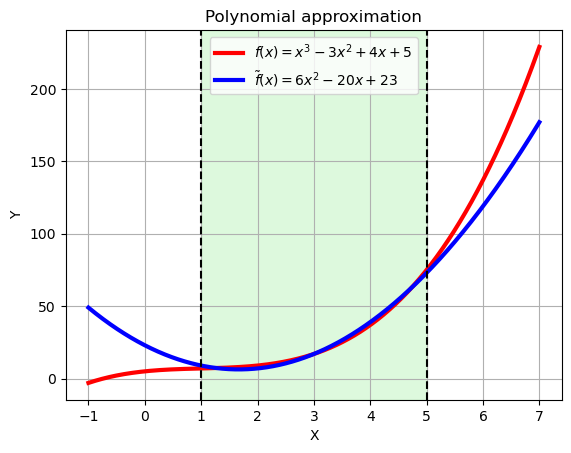

In [5]:
x = np.linspace(-1, 7, 1000)
y1 = x**3 - 3 * x**2 + 4 * x + 5
y2 = 6 * x**2 - 20 * x + 23
plt.plot(x, y1, label=r"$f(x) = x^3 - 3x^2 + 4x + 5$", linewidth=3, color="red")
plt.plot(x, y2, label=r"$\tilde{f}(x) = 6x^2 - 20x + 23$", linewidth=3, color="blue")
plt.axvline(x = 5, linestyle="--", color = "black")
plt.axvline(x = 1, linestyle="--", color = "black")
plt.axvspan(xmin=1, xmax=5, color="lightgreen", alpha=0.3)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial approximation")
plt.legend()
plt.grid()
plt.show()

---
---

## Problem 7
### Polynomial approximation on [1,6] in the specific norm 
Approximated function: $f(x) = \sqrt{4x+3}$.<br>

Norm: $|h|_T = \sqrt{\int_{1}^{6} \dfrac {h(x)^2}{\sqrt{1-(2x-7)^2/25}}\, dx}$.<br>

Consider the following substitution: $u = \dfrac{2x-7}{5}$ so that the norm becomes the following: $|h|_T = \sqrt{\int_{-1}^{1} \dfrac {\frac{5}{2}h^2(\frac{5u+7}{2})}{\sqrt{1-u^2}}\, du}$. <br>

Similarly $f(u) = \sqrt{4\cdot\dfrac{5u+7}{2}+3} = \sqrt{10u+17}$. <br>

Recall the general formula:<br>

$\tilde{f}(u) = \displaystyle\sum\limits_{i=0}^{3}\dfrac{\langle \; T_i, f\;\rangle}{\langle \; T_i, T_i \; \rangle} T_i(u) = \dfrac{\langle \; T_0(u), f(u)\;\rangle}{\pi} \cdot T_0(u)+ \dfrac{\langle \; T_1(u), f(u)\;\rangle}{\pi/2} \cdot T_1(u) + \dfrac{\langle \; T_2(u), f(u)\;\rangle}{\pi/2} \cdot T_2(u) + \dfrac{\langle \; T_3(u), f(u)\;\rangle}{\pi/2} \cdot T_3(u) = \\ = \dfrac{1}{\pi}\cdot \biggr(12.646 + 2 * 1.9762u - 2 * 0.1585 * (2u^2-1) + 2 * 0.0256*(4u^3-3u)\biggr) = 0.065u^3 - 0.202u^2 + 1.21u + 4.126 = \Bigr[u = \frac{2x-7}{5} \Bigr] = \\ = \mathbf{0.004x^3-0.076x^2+0.863x+1.858 = \tilde{f}(x)}.$ <br>

All integrals were calculated using WolframAlpha source.

Now, let's plot the results.

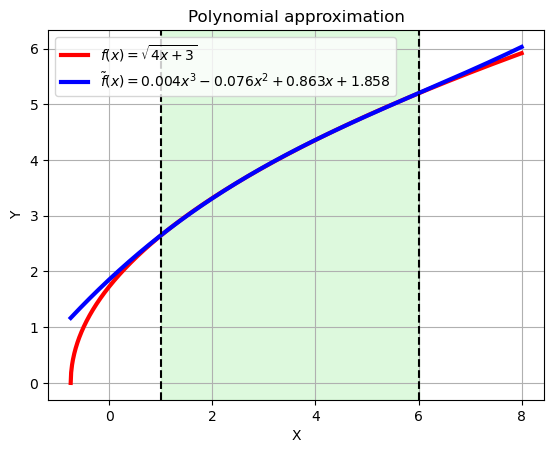

In [86]:
x = np.linspace(-3/4, 8, 1000)
y1 = np.sqrt(4*x+3)
y2 = 0.00416*x**3 - 0.076*x**2 + 0.86312*x + 1.85772
plt.plot(x, y1, label=r"$f(x) = \sqrt{4x+3}$", linewidth=3, color="red")
plt.plot(x, y2, label=r"$\tilde{f}(x) = 0.004x^3-0.076x^2+0.863x+1.858$", linewidth=3, color="blue")
plt.axvline(x = 6, linestyle="--", color = "black")
plt.axvline(x = 1, linestyle="--", color = "black")
plt.axvspan(xmin=1, xmax=6, color="lightgreen", alpha=0.3)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial approximation")
plt.legend()
plt.grid()
plt.show()

---
---

## Problem 8
### Values of q s.t. equation defines a unit circle wrt some norm. Norm of vector (1,1) as a function of q
Equation: $x^2 \cdot (3q-4) + xy\cdot(6-4q) + y^2 \cdot (8q+1) = 1$ <br>

$A = \begin{bmatrix} 3q-4 & 3-2q \\ 3-2q & 8q+1 \\ \end{bmatrix}, v = \begin{bmatrix} 1 & 1 \\ \end{bmatrix}^T$ <br>

$|v| = \sqrt{v^TAv} = \sqrt{\begin{bmatrix} q-1 & 6q+4 \\ \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix}} = \sqrt{7q+3}$ - norm of the unitary vector as a function of q.